# How do structural features relate to DMS reactivity for WC pairs

Conclusions atm: It seems all WC residues that are reactive are actually residues within the motif forming like singlet like pairs, although its unclear how many are true WC pairs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = '../dms_3d_features/resources/csvs'

In [15]:
df = pd.read_csv(f'{DATA_PATH}/wc_details.csv')
df["ln_r_data"] = np.log(df["r_data"])
df_flank = df.query("flanking_pairs == 'YES'").copy()

/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='r_data', ylabel='rmsd_from_ideal'>

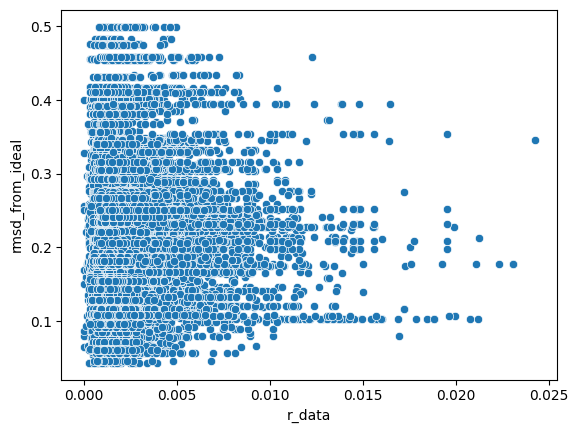

In [16]:
sns.scatterplot(data= df_flank, x='r_data', y='rmsd_from_ideal')

<Axes: xlabel='r_data', ylabel='shear'>

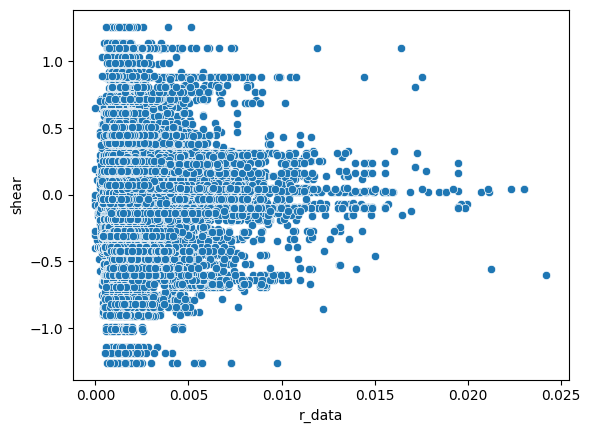

In [22]:
sns.scatterplot(data= df_flank, x='r_data', y='shear')

<Axes: xlabel='r_data', ylabel='stretch'>

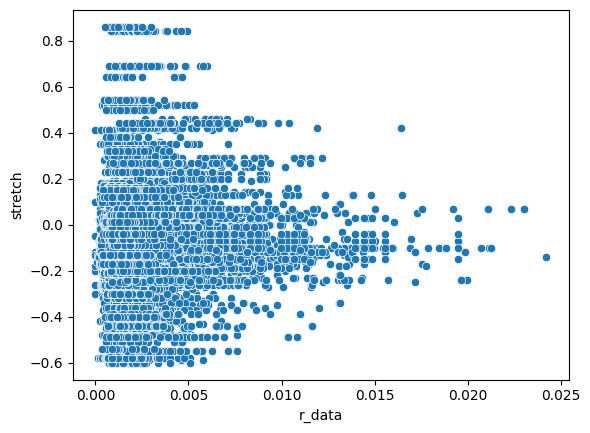

In [17]:
sns.scatterplot(data= df_flank, x='r_data', y='stretch')

<Axes: xlabel='r_data', ylabel='stagger'>

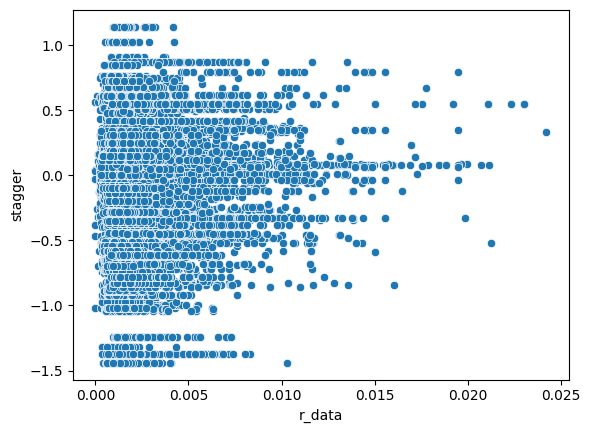

In [18]:
sns.scatterplot(data= df_flank, x='r_data', y='stagger')

<Axes: xlabel='r_data', ylabel='buckle'>

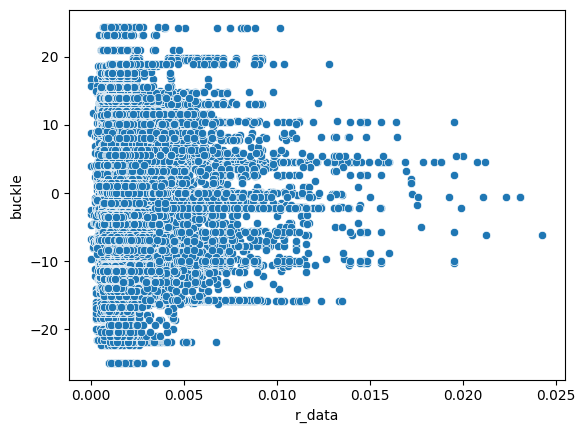

In [19]:
sns.scatterplot(data= df_flank, x='r_data', y='buckle')

<Axes: xlabel='r_data', ylabel='propeller'>

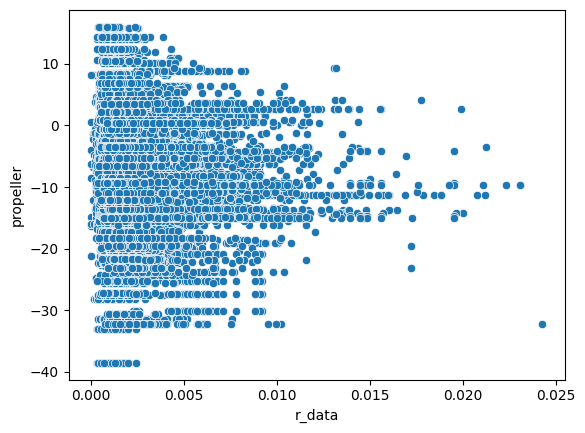

In [20]:
sns.scatterplot(data= df_flank, x='r_data', y='propeller')

<Axes: xlabel='r_data', ylabel='opening'>

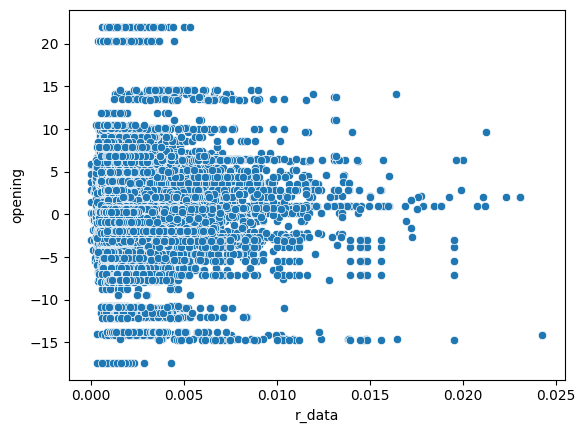

In [21]:
sns.scatterplot(data= df_flank, x='r_data', y='opening')

<Axes: xlabel='r_data', ylabel='bp'>

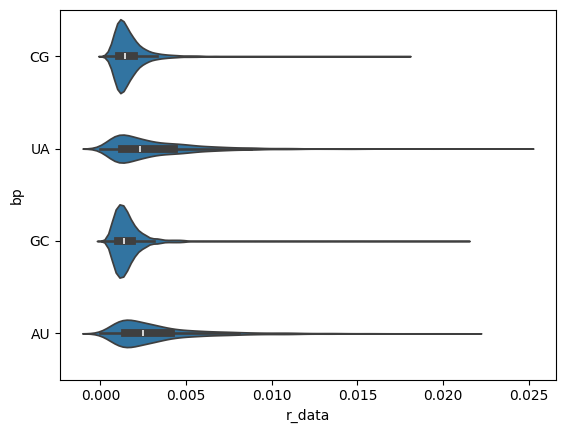

In [27]:
df_sub = df.query("flanking_pairs == 'YES'").copy()
sns.violinplot(data= df_sub, x='r_data', y='bp')

<Axes: xlabel='rmsd_from_ideal', ylabel='bp'>

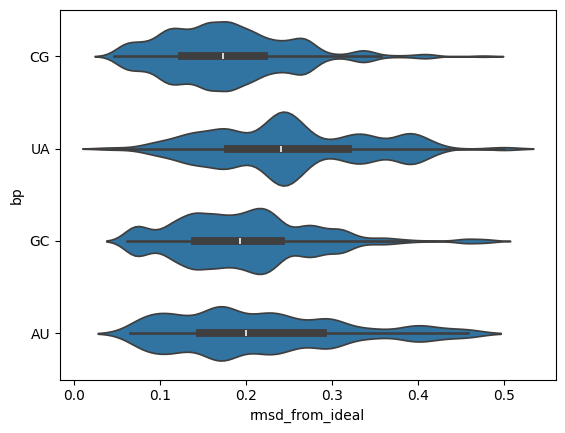

In [28]:
df_sub = df.query("flanking_pairs == 'YES'").copy()
sns.violinplot(data= df_sub, x='rmsd_from_ideal', y='bp')

<Axes: xlabel='r_data', ylabel='bp'>

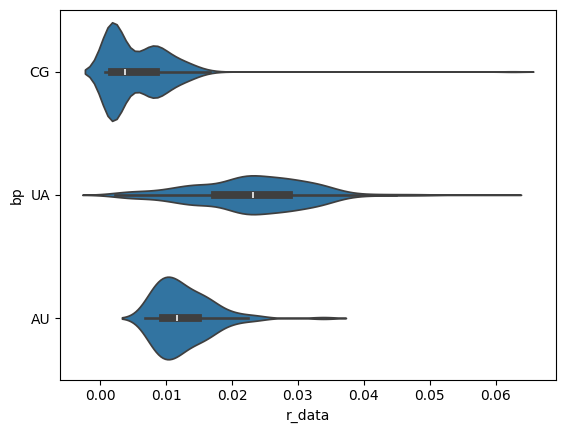

In [29]:
df_sub = df.query("flanking_pairs == 'NO'").copy()
sns.violinplot(data= df_sub, x='r_data', y='bp')

<Axes: xlabel='rmsd_from_ideal', ylabel='bp'>

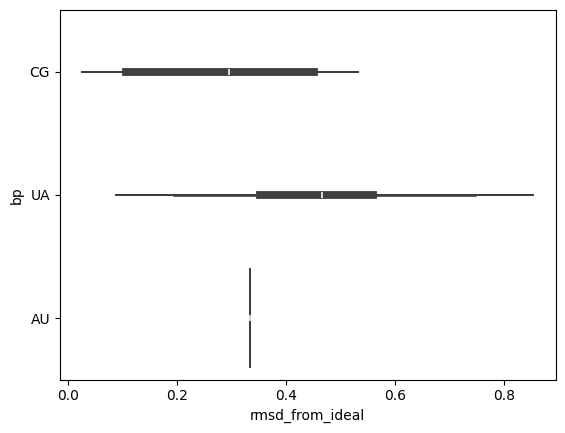

In [30]:
df_sub = df.query("flanking_pairs == 'NO'").copy()
sns.violinplot(data= df_sub, x='rmsd_from_ideal', y='bp')

<Axes: xlabel='bp', ylabel='r_data_binned'>

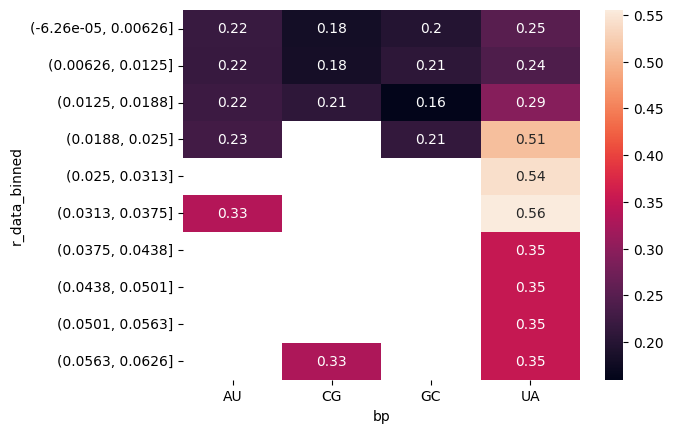

In [31]:
df['r_data_binned'] = pd.cut(df['r_data'], bins=10)
data = df.pivot_table(index="r_data_binned", columns="bp", values="rmsd_from_ideal", aggfunc='mean')
sns.heatmap(data,annot=True)

<Axes: xlabel='bp', ylabel='rmsd_from_ideal_binned'>

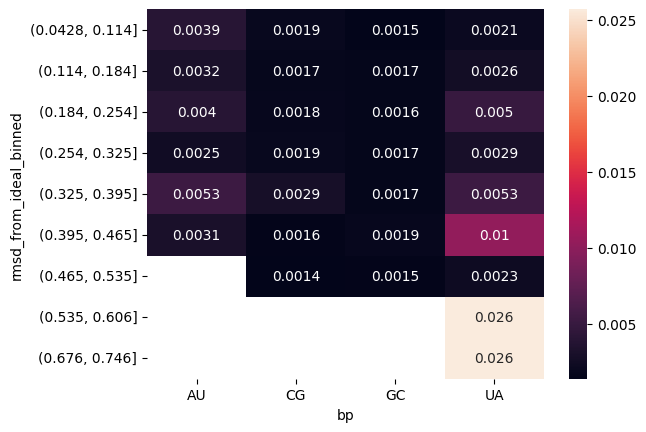

In [32]:
df['rmsd_from_ideal_binned'] = pd.cut(df['rmsd_from_ideal'], bins=10)
data = df.pivot_table(index="rmsd_from_ideal_binned", columns="bp", values="r_data", aggfunc='mean')
sns.heatmap(data,annot=True)

<Axes: xlabel='r_data_binned', ylabel='rmsd_from_ideal_binned'>

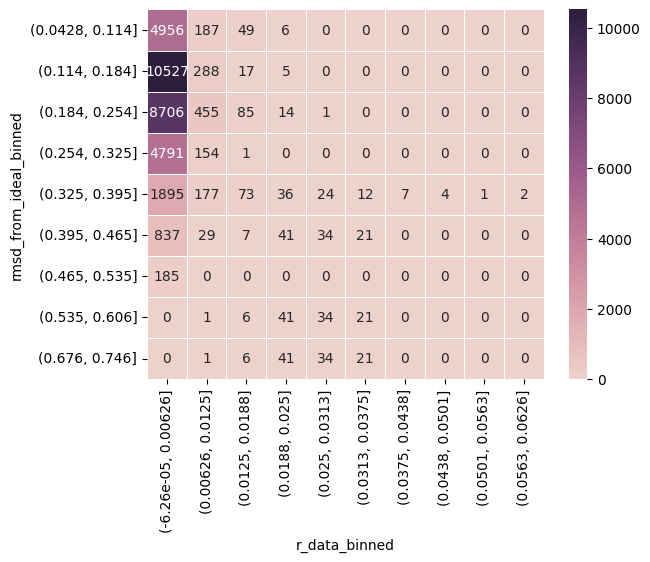

In [33]:
df['rmsd_from_ideal_binned'] = pd.cut(df['rmsd_from_ideal'], bins=10)
df['r_data_binned'] = pd.cut(df['r_data'], bins=10)
df_sns = pd.crosstab(df['rmsd_from_ideal_binned'], df['r_data_binned'])
sns.heatmap(df_sns, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), linewidth=.5, fmt='.0f')